# Empty-space based filtering

In [1]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from methods.method_empty_space import empty_space_denoising
from benchmark_demo.SignalBank import SignalBank

Loading all modules in methods folder...


In [2]:
np.random.seed(0) 
# signal parameters
SNRin = 20
N = 2**9
sbank = SignalBank(N=N)
# s = sbank.signal_cos_chirp()
s = sbank.signal_mc_multi_linear()

signal = add_snr(s,SNRin)

In [3]:
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, stft, stft_padded, Npad = get_spectrogram(signal, window = g)
dict_out = empty_space_denoising(signal,return_dic=True,radi_seg=0.9)
sr = dict_out['s_r']
mask = dict_out['mask']
print(10*np.log10((np.sum(s**2))/(np.sum((s-sr)**2))))

8.449688773654113


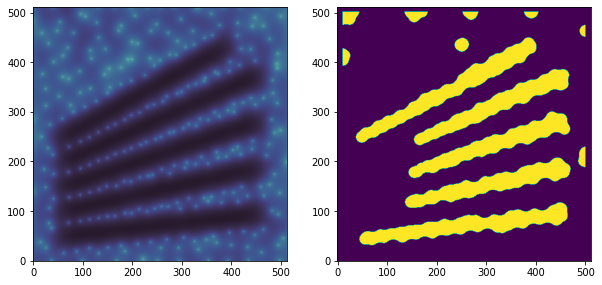

In [4]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(np.log10(S), origin='lower', cmap=cmocean.cm.deep)
ax[1].imshow(mask, origin='lower')
plt.show()